## ***`UMAP`***
### ***`Uniform Manifold Approximation and Projection for Dimension Reduction`***
---

##### **The objective for creating this notebook is to understand UMAP intuitively, how it is better than T-SNE and where we can use it effectively.**

#### **Notebook Contents**

1. [Geometric Intuition](#Geometric_Intuition)
2. [Import Packages](#Import_Packages)
3. [UMAP Usecase :: Breast Cancer Dataset](#UMAP_Usecase)

#### **Geometric_Intuition**

- The two main parts of UMAP is to build the higher dimensional graph construction then enbedding this higher dimensional graph to lower dimension

In [1]:
import numpy as np
from sklearn import decomposition
from sklearn import datasets
from babyplots import Babyplot

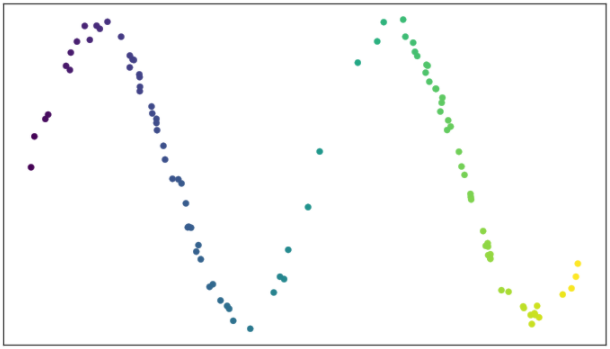

In [2]:
from IPython.display import Image

Image("Refer_Notes\\UMAP_Images\\Img1.png",width=550,height=550)

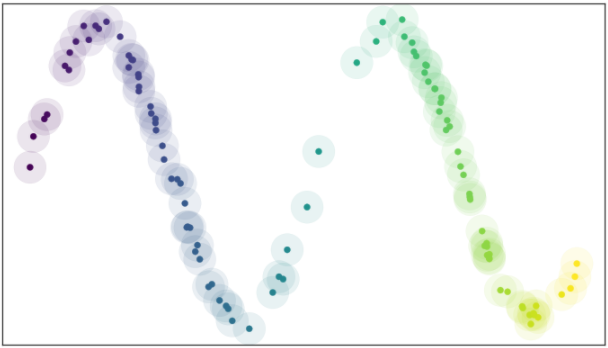

In [3]:
from IPython.display import Image

Image("Refer_Notes\\UMAP_Images\\Img2.png",width=550,height=550)

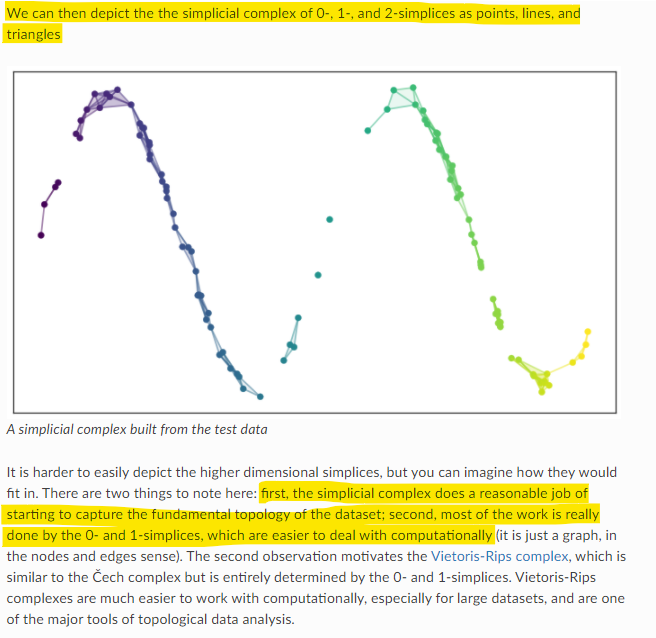

In [4]:
from IPython.display import Image

Image("Refer_Notes\\UMAP_Images\\Img3.png",width=700,height=700)

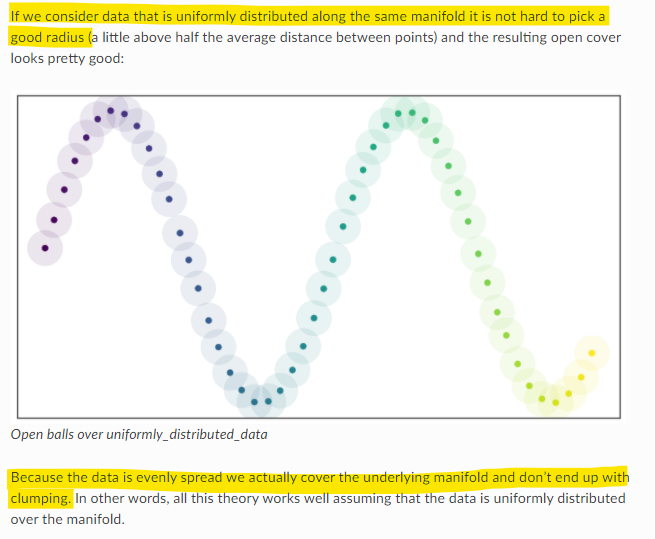

In [5]:
from IPython.display import Image

Image("Refer_Notes\\UMAP_Images\\Img4.png",width=700,height=700)

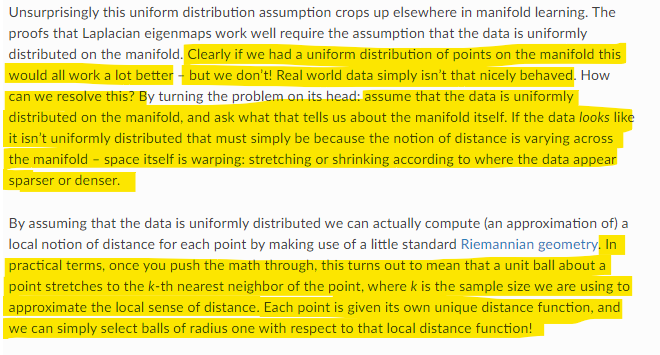

In [6]:
from IPython.display import Image

Image("Refer_Notes\\UMAP_Images\\Img5.png",width=700,height=700)

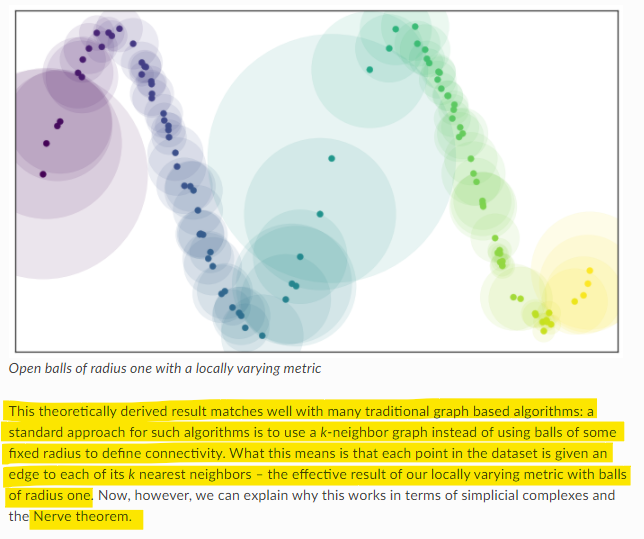

In [7]:
from IPython.display import Image

Image("Refer_Notes\\UMAP_Images\\Img6.png",width=700,height=700)

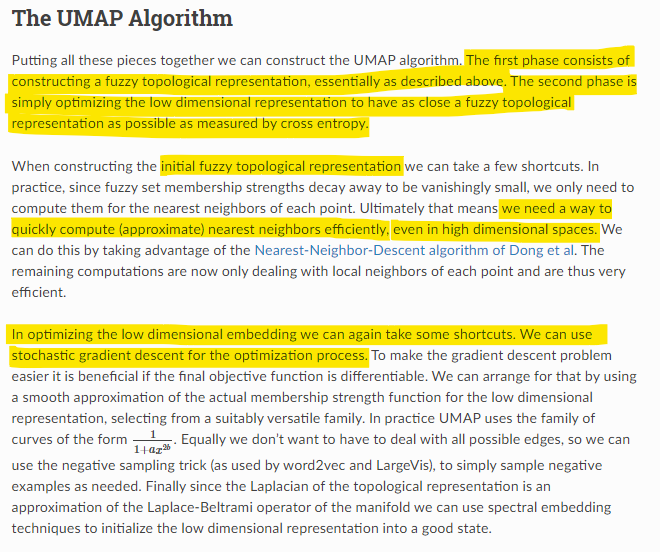

In [8]:
from IPython.display import Image

Image("Refer_Notes\\UMAP_Images\\Img7.png",width=700,height=700)

#### **Import_Packages**

In [9]:
import umap

In [10]:
dir(umap)

['UMAP',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'distances',
 'layouts',
 'nndescent',
 'numba',
 'pkg_resources',
 'rp_tree',
 'sparse',
 'sparse_nndescent',
 'spectral',
 'umap_',
 'utils']

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.datasets import load_breast_cancer as bc, load_iris as l_iris
from sklearn.preprocessing import StandardScaler as SS
from sklearn.manifold import TSNE

%matplotlib inline

#### **UMAP_Usecase**
#### **Applying UMAP on Breast Cancer Dataset**

In [12]:
cancer = bc()                                  ## Instantiating Breast Cancer Dataset object
iris = l_iris()                                ## Instantiating IRIS Datset object
ss = SS()                                      ## Instantiating Standard Scaler
tsne = TSNE(n_components=3, random_state=41)   ## Instantiating TSNE

In [13]:
cancer_df = pd.concat([pd.DataFrame(cancer.data,columns=cancer.feature_names),pd.DataFrame(cancer.target,columns=['target'])],axis=1)
cancer_norm_df = pd.DataFrame(ss.fit_transform(cancer_df.iloc[:,0:-1]),columns=cancer.feature_names)
cancer_norm_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [14]:
umap_cancer = umap.UMAP(n_neighbors=11,
                        n_components=3,
#                         metric=scipy.spatial.minkowski_distance,
#                         output_metric=scipy.spatial.minkowski_distance,
                        n_epochs=500,
                       learning_rate=0.5,
                       min_dist=1,
                       spread=2)

In [15]:
umap_cancer_cmps = pd.DataFrame(umap_cancer.fit_transform(cancer_norm_df),columns=['PC1','PC2','PC3'])
umap_cancer_cmps.head()

,PC1,PC2,PC3
0,-2.509928,2.968512,6.418724
1,0.919889,7.963810,8.682273
2,-1.986632,4.028723,7.626415
3,0.697041,-0.168104,5.997721
4,0.023921,6.602288,6.438046


In [16]:
umap_cancer_cmps.shape

(569, 3)

In [17]:
umap_cancer_cmps = pd.concat([umap_cancer_cmps,cancer_df['target']],axis=1)
umap_cancer_cmps.head()

,PC1,PC2,PC3,target
0,-2.509928,2.968512,6.418724,0
1,0.919889,7.963810,8.682273,0
2,-1.986632,4.028723,7.626415,0
3,0.697041,-0.168104,5.997721,0
4,0.023921,6.602288,6.438046,0


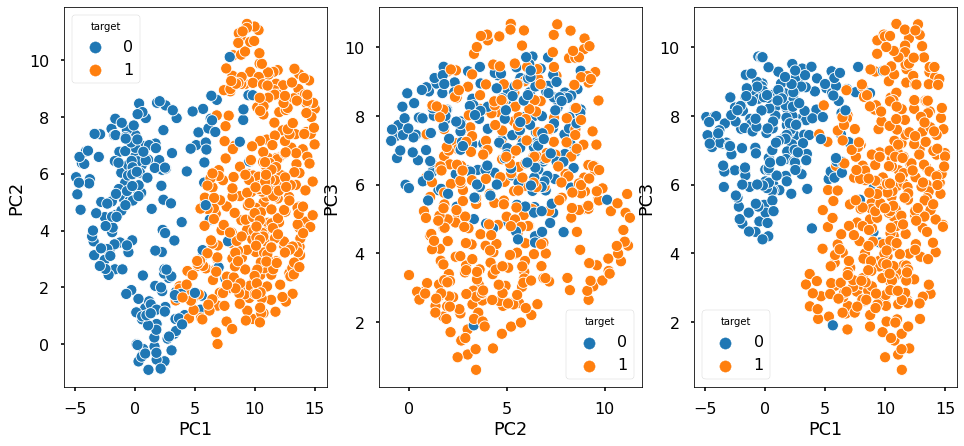

In [18]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,7))
    sns.scatterplot(data=umap_cancer_cmps,x='PC1',y='PC2',hue='target',ax=ax[0])
    sns.scatterplot(data=umap_cancer_cmps,x='PC2',y='PC3',hue='target',ax=ax[1])
    sns.scatterplot(data=umap_cancer_cmps,x='PC1',y='PC3',hue='target',ax=ax[2])
    plt.show()

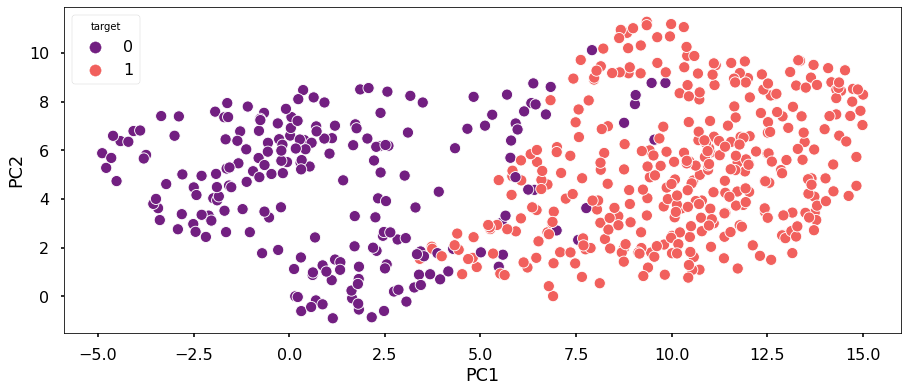

In [19]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
    sns.scatterplot(data=umap_cancer_cmps,x='PC1',y='PC2',hue='target',ax=ax,palette='magma')
    plt.show();

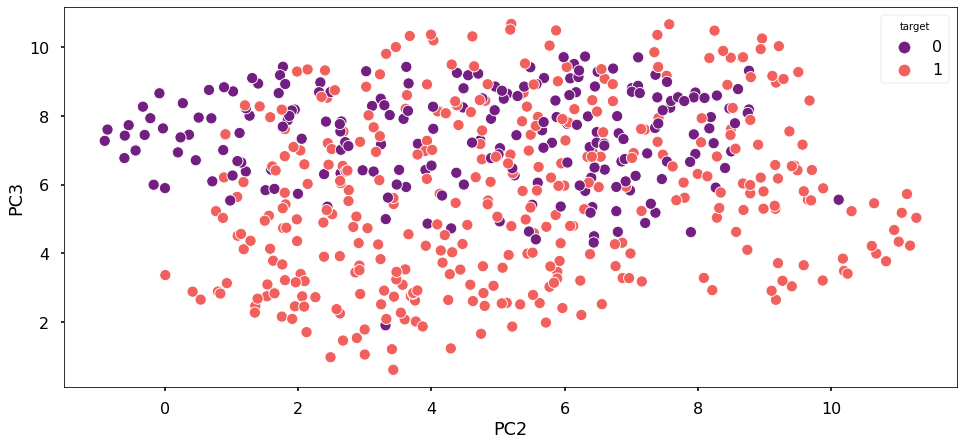

In [20]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,7))
    sns.scatterplot(data=umap_cancer_cmps,x='PC2',y='PC3',hue='target',ax=ax,palette='magma')
    plt.show()

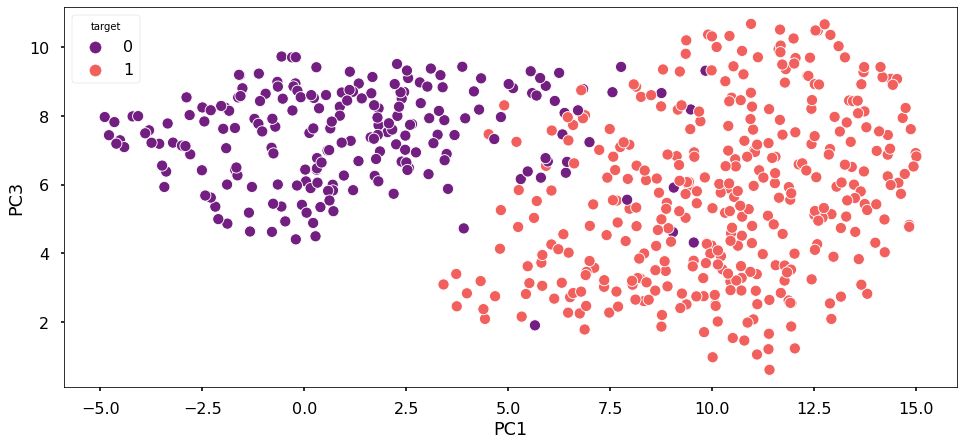

In [21]:
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,7))
    sns.scatterplot(data=umap_cancer_cmps,x='PC1',y='PC3',hue='target',ax=ax,palette='magma')
    plt.show()

In [22]:
umap_cancer_cmps

,PC1,PC2,PC3,target
0,-2.509928,2.968512,6.418724,0
1,0.919889,7.963810,8.682273,0
2,-1.986632,4.028723,7.626415,0
3,0.697041,-0.168104,5.997721,0
4,0.023921,6.602288,6.438046,0
...,...,...,...,...
564,-2.999779,6.595969,7.136393,0
565,-0.755743,7.239864,6.910088,0
566,4.657914,6.883886,7.327774,0
567,-2.912424,2.754453,7.123294,0


In [41]:
X = umap_cancer_cmps.iloc[:,0:-1].values
y = umap_cancer_cmps.iloc[:,-1].values

# create the babyplots visualization
bp = Babyplot(width=550,height=400,show_ui=False,turntable=True,background_color='#f7ffff')
bp.add_plot(X.tolist(), "shapeCloud", "categories", y.tolist(), {"shape": "cone,box",
                                                                 "colorScale": "viridis",
                                                                 "showAxes": [True, True, True],
                                                                 "showlegend":True,
                                                                 "fontsize":16,
                                                                 "axisLabels": ["PC 1", "PC 2", "PC 3"]})
# show t
bp

<IPython.core.display.Javascript object>

#### **:: Reference Links ::**

UMAP
- https://www.youtube.com/watch?v=6BPl81wGGP8
- https://www.sciencedirect.com/science/article/pii/S0010482521000585
- https://umap-learn.readthedocs.io/en/latest/parameters.html
- https://umap-learn.readthedocs.io/en/latest/reproducibility.html
- https://pair-code.github.io/understanding-umap/

UMAP v/s T-SNE
- https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668#:~:text=We%20know%20that%20UMAP%20is,dimensions%20in%20the%20data%20set.&text=Since%20both%20tSNE%20and%20UMAP,it%20more%20efficiently%20than%20tSNE.

T-SNE
- https://lvdmaaten.github.io/tsne/

Barnes-Hut T-SNE
- https://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6402590/
- https://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf

UMAP uses PyNNDescent
- https://pypi.org/project/pynndescent/